In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from matplotlib.font_manager import FontProperties
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import FeatureAgglomeration
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn.cluster import FeatureAgglomeration

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [4]:
# 读取 Excel 文件
df = pd.read_excel('贝叶斯数据整理.xlsx', sheet_name='Sheet1')  # 替换为你的文件名和工作表名

# 显示数据
print(df.head())

   硫酸铜  氟硅酸铵  CYA-71-15  CYA-103  CYA-98  CYA-97  CYA-96  CYA-95-1  CYA-95  \
0  NaN   NaN        NaN      NaN     NaN     NaN     NaN       NaN     NaN   
1  NaN   NaN        NaN      NaN     NaN     NaN     NaN       NaN     NaN   
2  NaN   NaN        NaN      NaN     NaN     NaN     NaN       NaN     NaN   
3  NaN   NaN        NaN      NaN     NaN     NaN     NaN       NaN     NaN   
4  NaN   NaN        NaN      NaN     NaN     NaN     NaN       NaN     NaN   

   CYA-94  ...  DF1012    温度    PH  氯化钙  氯化镁  铁精矿产率  给矿品位S   尾矿品味  铁精矿品味S  \
0     NaN  ...     NaN  19.7  5.48  NaN  NaN  84.25   2.66  16.25    0.12   
1     NaN  ...    67.0  39.3  5.07  NaN  NaN  84.07   2.38  14.40    0.10   
2     NaN  ...    67.0  38.5  5.82  NaN  NaN  85.26   2.38  13.01    0.54   
3     NaN  ...    67.0  37.9  5.26  NaN  NaN  84.19   2.38  13.02    0.38   
4     NaN  ...    67.0  39.8  5.26  NaN  NaN  83.84   2.38  13.59    0.15   

    回收率S  
0   3.80  
1   3.54  
2  19.36  
3  13.45  
4   5.29  

[

In [5]:
x = df[['硫酸铜', '氟硅酸铵', 'CYA-71-15', 'CYA-103', 'CYA-98', 'CYA-97', 'CYA-96', 
        'CYA-95-1', 'CYA-95', 'CYA-94', 'CYA-93', 'CYA-92', 'CYA-91', 'Z-200', '柴油', 
        'CYA-90', 'CYA-89', 'CYA-75', 'CYA-65', 'CYA-60', 'CYA-86', 'CYA-20', 'CYA-85', 
        'CYA-84', 'CYA-76', 'CYA-77', 'CYA-78', 'CYA-79', 'CYS-2', 'CYC-9', 'CYC-13', 
        'CYC-1', 'CYW-30', '丁黄', '丁铵', '戊黄药', '2#油', 'DF1012', '温度', 'PH', 
        '氯化钙', '氯化镁','给矿品位S']]
y = df['铁精矿品味S']

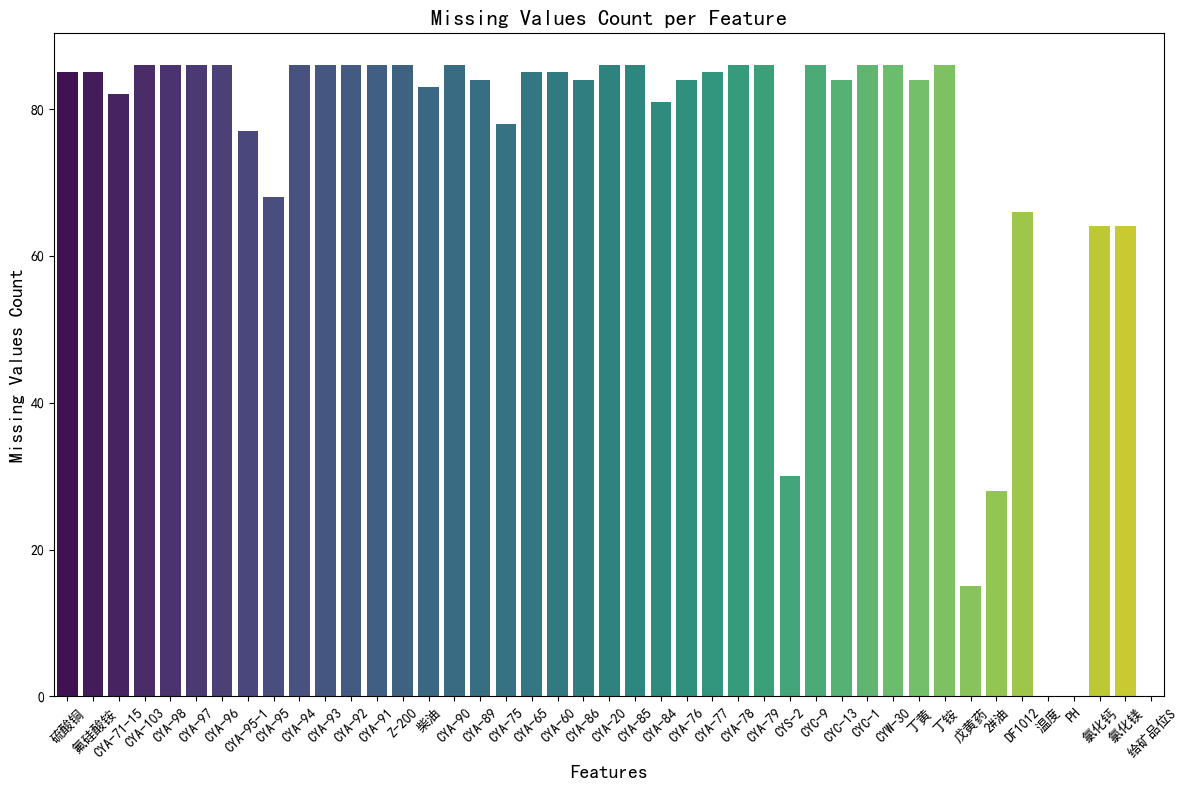

In [6]:
# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体（SimHei）
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 统计每个特征中的缺失值数量
missing_values = x.isnull().sum()

# 设置图像大小
plt.figure(figsize=(12, 8))

# 绘制缺失值统计的条形图
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

# 添加标题和标签
plt.title('Missing Values Count per Feature', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Missing Values Count', fontsize=14)

# 旋转x轴标签，避免重叠
plt.xticks(rotation=45)

# 展示图像
plt.tight_layout()
plt.show()

In [6]:
# # 找到缺失值超过80的特征
# missing_threshold = 80
# features_to_check = missing_values[missing_values > missing_threshold].index

# # 删除在这些特征上有数值的数据点
# for feature in features_to_check:
#     x = x[x[feature].isnull()]

# # 如果你需要重置索引，可以添加下面的代码
# x.reset_index(drop=True, inplace=True)

In [14]:
# 填充缺失值为0
x_filled = x.fillna(0)

# 查看是否有缺失值
print(x_filled.isnull().sum())

硫酸铜          0
氟硅酸铵         0
CYA-71-15    0
CYA-103      0
CYA-98       0
CYA-97       0
CYA-96       0
CYA-95-1     0
CYA-95       0
CYA-94       0
CYA-93       0
CYA-92       0
CYA-91       0
Z-200        0
柴油           0
CYA-90       0
CYA-89       0
CYA-75       0
CYA-65       0
CYA-60       0
CYA-86       0
CYA-20       0
CYA-85       0
CYA-84       0
CYA-76       0
CYA-77       0
CYA-78       0
CYA-79       0
CYS-2        0
CYC-9        0
CYC-13       0
CYC-1        0
CYW-30       0
丁黄           0
丁铵           0
戊黄药          0
2#油          0
DF1012       0
温度           0
PH           0
氯化钙          0
氯化镁          0
给矿品位S        0
dtype: int64


In [17]:
# 特征标准化
scaler = StandardScaler()
x_filled_scaled = scaler.fit_transform(x_filled)


In [19]:
# 指定降维后的特征数量，例如将特征数量减少到 10
n_clusters = 10
agglo = FeatureAgglomeration(n_clusters=n_clusters)
x_filled_reduced = agglo.fit_transform(x_filled_scaled)

# 输出降维后的特征形状
print(f'降维后的特征形状: {x_filled_reduced.shape}')

降维后的特征形状: (87, 10)


In [33]:
x_filled_reduced

array([[-0.32814336, -0.34414143, -0.19661881,  0.15359827,  0.40633005,
        -0.13475962, -0.14891596, -0.40154702,  0.57502706, -0.153393  ],
       [-0.09789274, -0.34414143, -0.19661881,  0.15359827, -0.19845217,
        -0.13475962, -0.14891596,  0.77644314, -0.36519435, -0.153393  ],
       [-0.10729073, -0.34414143,  1.17350241, -0.49999695,  0.90785677,
        -0.13475962, -0.14891596,  0.77644314, -0.36519435, -0.153393  ],
       [ 0.36227474, -0.34414143, -0.19661881, -0.49999695,  0.08181276,
        -0.13475962, -0.14891596,  0.77644314, -0.36519435, -0.153393  ],
       [-0.092019  , -0.34414143, -0.19661881, -0.49999695,  0.08181276,
        -0.13475962,  0.83768407,  0.77644314, -0.36519435, -0.153393  ],
       [-0.05207757, -0.34414143, -0.19661881, -0.49999695, -0.0656951 ,
        -0.13475962,  3.18304689,  0.77644314, -1.24763624, -0.153393  ],
       [-0.09554324, -0.34414143, -0.19661881, -0.49999695,  0.1408159 ,
        -0.13475962,  3.18304689,  0.77644314

In [23]:
# 3. 使用降维后的特征进行模型训练（以线性回归为例）
X_train, X_test, y_train, y_test = train_test_split(x_filled_reduced, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# 评估模型
score = model.score(X_test, y_test)
print(f'模型的 R^2 分数: {score:.4f}')

模型的 R^2 分数: 0.0098


F:\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


R² 分数: 0.12200664801413419


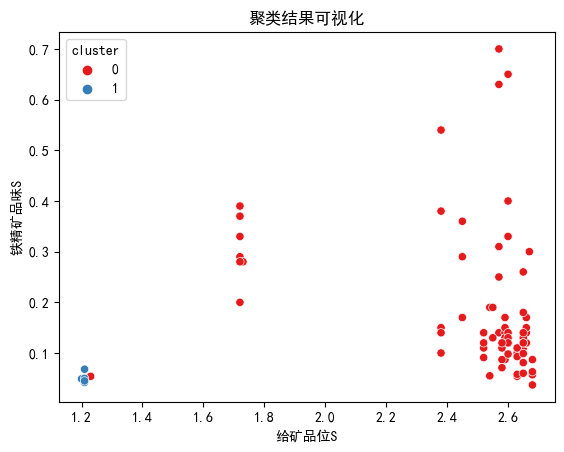

In [37]:
# 层次聚类
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
df['cluster'] = model.fit_predict(x_filled)

# 分割训练集和测试集 (以聚类后的数据为基础)
x_train, x_test, y_train, y_test = train_test_split(x_filled, y, test_size=0.2, random_state=42)

# 使用回归模型 (以 RandomForestRegressor 为例)
regressor = RandomForestRegressor(random_state=42)
regressor.fit(x_train, y_train)

# 预测并计算 R² 分数
y_pred = regressor.predict(x_test)
r2 = r2_score(y_test, y_pred)

print(f"R² 分数: {r2}")

# 可视化聚类结果 (假设 '给矿品位S' 和 '铁精矿品味S' 是你想要可视化的特征)
sns.scatterplot(data=df, x='给矿品位S', y='铁精矿品味S', hue='cluster', palette='Set1')
plt.title("聚类结果可视化")
plt.show()

In [8]:
# 统计缺失值大于80的特征
missing_values = x.isnull().sum()
columns_to_drop = missing_values[missing_values > 40].index

# 打印出需要删除的特征
print(f"Columns with more than 80 missing values: {list(columns_to_drop)}")

# 删除这些列
x_cleaned = x.drop(columns=columns_to_drop)

# 打印删除后的数据
print(f"Remaining columns after deletion: {x_cleaned.columns}")

Columns with more than 80 missing values: ['硫酸铜', '氟硅酸铵', 'CYA-71-15', 'CYA-103', 'CYA-98', 'CYA-97', 'CYA-96', 'CYA-94', 'CYA-93', 'CYA-92', 'CYA-91', 'Z-200', '柴油', 'CYA-90', 'CYA-89', 'CYA-65', 'CYA-60', 'CYA-86', 'CYA-20', 'CYA-85', 'CYA-84', 'CYA-76', 'CYA-77', 'CYA-78', 'CYA-79', 'CYC-9', 'CYC-13', 'CYC-1', 'CYW-30', '丁黄', '丁铵']
Remaining columns after deletion: Index(['CYA-95-1', 'CYA-95', 'CYA-75', 'CYS-2', '戊黄药', '2#油', 'DF1012', '温度',
       'PH', '氯化钙', '氯化镁', '给矿品位S'],
      dtype='object')


In [9]:
# 将 x_cleaned 中的缺失值填充为 0
x_cleaned_filled = x_cleaned.fillna(0)

# 查看填充后的数据是否还有缺失值
print(x_cleaned_filled.isnull().sum())

CYA-95-1    0
CYA-95      0
CYA-75      0
CYS-2       0
戊黄药         0
2#油         0
DF1012      0
温度          0
PH          0
氯化钙         0
氯化镁         0
给矿品位S       0
dtype: int64


In [10]:
x_cleaned_filled

,CYA-95-1,CYA-95,CYA-75,CYS-2,戊黄药,2#油,DF1012,温度,PH,氯化钙,氯化镁,给矿品位S
0,0.0,0.0,0.0,2000.0,200.0,67.0,0.0,19.7,5.48,0.0,0.0,2.66
1,0.0,0.0,0.0,2000.0,200.0,0.0,67.0,39.3,5.07,0.0,0.0,2.38
2,0.0,0.0,0.0,2000.0,200.0,0.0,67.0,42.1,4.78,0.0,0.0,2.68
3,0.0,0.0,0.0,2000.0,200.0,0.0,67.0,38.8,4.88,0.0,0.0,2.54
4,0.0,0.0,0.0,2000.0,200.0,67.0,0.0,42.9,4.88,0.0,0.0,2.65
5,0.0,0.0,0.0,2000.0,200.0,67.0,0.0,41.4,4.78,0.0,0.0,2.54
6,0.0,1000.0,0.0,1000.0,200.0,67.0,0.0,39.3,5.28,0.0,0.0,2.59
7,0.0,900.0,0.0,1100.0,200.0,67.0,0.0,40.0,5.14,0.0,0.0,2.59
8,0.0,800.0,0.0,1200.0,200.0,67.0,0.0,40.8,4.99,0.0,0.0,2.59
9,0.0,700.0,0.0,1300.0,200.0,67.0,0.0,38.9,5.04,0.0,0.0,2.59


In [11]:
y = df['铁精矿品味S'].loc[x_cleaned_filled.index]

In [24]:
# 将 y 分为训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x_filled_reduced, y, test_size=0.1, random_state=42)

# 打印 y_train 和 y_test 的大小
print(f"Training labels size: {y_train.shape}")
print(f"Test labels size: {y_test.shape}")

Training labels size: (78,)
Test labels size: (9,)


In [25]:
# 数据标准化
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)




In [26]:
# 创建 LassoCV 模型
lasso_model = LassoCV(alphas=np.logspace(-3, 0, 10), cv=5)

# 在训练集上进行留一交叉验证
loo = LeaveOneOut()
train_mse_list = []

for train_index, test_index in loo.split(x_train_scaled):
    X_train_loo, X_test_loo = x_train_scaled[train_index], x_train_scaled[test_index]
    y_train_loo, y_test_loo = y_train.iloc[train_index], y_train.iloc[test_index]

    # 拟合模型
    lasso_model.fit(X_train_loo, y_train_loo)

    # 在测试集上进行预测
    y_test_pred_loo = lasso_model.predict(X_test_loo)

    # 计算均方误差 (MSE)
    mse_loo = mean_squared_error(y_test_loo, y_test_pred_loo)
    train_mse_list.append(mse_loo)

# 计算 LOOCV 的均方误差的平均值
average_train_mse = np.mean(train_mse_list)

# 在训练集和测试集上进行预测
y_train_pred = lasso_model.predict(x_train_scaled)
y_test_pred = lasso_model.predict(x_test_scaled)

# 计算训练集和测试集的均方误差 (MSE) 和 R² 分数
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 打印结果
print(f"Average LOOCV Training MSE: {average_train_mse:.4f}")
print(f"Training MSE: {train_mse:.4f}, Training R²: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")

Average LOOCV Training MSE: 0.0126
Training MSE: 0.0094, Training R²: 0.4128
Test MSE: 0.0291, Test R²: 0.1839


In [27]:

lasso_model = Lasso(alpha=0.1)  # 可以根据需要调整 alpha 值

# 拟合模型
lasso_model.fit(x_train, y_train)

# 在训练集和测试集上进行预测
y_train_pred = lasso_model.predict(x_train)
y_test_pred = lasso_model.predict(x_test)

# 计算训练集和测试集的均方误差 (MSE) 和 R² 分数
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 打印结果
print(f"Training MSE: {train_mse:.4f}, Training R²: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")

Training MSE: 0.0160, Training R²: 0.0000
Test MSE: 0.0356, Test R²: -0.0001


In [28]:
ridge_model = RidgeCV(alphas=np.logspace(-3, 0, 10), store_cv_values=True)  # 尝试不同的 alpha 值


In [29]:
# 在训练集上进行留一交叉验证
loo = LeaveOneOut()
train_mse_list = []

for train_index, test_index in loo.split(x_train_scaled):
    X_train_loo, X_test_loo = x_train_scaled[train_index], x_train_scaled[test_index]
    y_train_loo, y_test_loo = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # 拟合模型
    ridge_model.fit(X_train_loo, y_train_loo)

    # 在测试集上进行预测
    y_test_pred_loo = ridge_model.predict(X_test_loo)

    # 计算均方误差 (MSE)
    mse_loo = mean_squared_error(y_test_loo, y_test_pred_loo)
    train_mse_list.append(mse_loo)

# 计算 LOOCV 的均方误差的平均值
average_train_mse = np.mean(train_mse_list)

# 在训练集和测试集上进行预测
y_train_pred = ridge_model.predict(x_train_scaled)
y_test_pred = ridge_model.predict(x_test_scaled)

# 计算训练集和测试集的均方误差 (MSE) 和 R² 分数
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 打印结果
print(f"Average LOOCV Training MSE: {average_train_mse:.4f}")
print(f"Training MSE: {train_mse:.4f}, Training R²: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")

Average LOOCV Training MSE: 0.0129
Training MSE: 0.0093, Training R²: 0.4176
Test MSE: 0.0298, Test R²: 0.1637


In [30]:
# 创建随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)  # 设置 n_estimators 和 max_depth
# 在训练集上进行留一交叉验证
loo = LeaveOneOut()
train_mse_list = []

for train_index, test_index in loo.split(x_train):
    X_train_loo, X_test_loo = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_loo, y_test_loo = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # 拟合模型
    rf_model.fit(X_train_loo, y_train_loo)

    # 在测试集上进行预测
    y_test_pred_loo = rf_model.predict(X_test_loo)

    # 计算均方误差 (MSE)
    mse_loo = mean_squared_error(y_test_loo, y_test_pred_loo)
    train_mse_list.append(mse_loo)

# 计算 LOOCV 的均方误差的平均值
average_train_mse = np.mean(train_mse_list)

# 在训练集和测试集上进行预测
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

# 计算训练集和测试集的均方误差 (MSE) 和 R² 分数
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 打印结果
print(f"Average LOOCV Training MSE: {average_train_mse:.4f}")
print(f"Training MSE: {train_mse:.4f}, Training R²: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'